# Análisis exploratorio de los datos

En este script se realiza el análisis exploratorio de los datos - promedios por colegios una vez limpia la base y creado las variables por colegio

## 1. Librerías

In [9]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import math
import textwrap

from functools import reduce
warnings.filterwarnings('ignore')

## 2. Datos

In [10]:
df_colegios_matematica_y_lengua = pd.read_excel('../outputs/dataset_final_colegios_y_variables.xlsx', sheet_name='data')

In [11]:
df_colegios_matematica_y_lengua.shape

(11357, 309)

In [12]:
df_colegios_matematica_y_lengua.columns.to_list()

['ID1',
 'porcentaje_satisfactorio',
 'numero_alumnos',
 'jurisdiccion',
 'sector',
 'ambito',
 'secciones_por_colegio',
 'region',
 'NSE_puntaje',
 'personas_por_habitacion',
 'clima_escolar',
 'ap06e_1_pct',
 'ap06e_2_pct',
 'ap06e_3_pct',
 'ap06e_4_pct',
 'Nivel_Ed_Madre_1.0_pct',
 'Nivel_Ed_Madre_2.0_pct',
 'Nivel_Ed_Madre_3.0_pct',
 'Nivel_Ed_Madre_4.0_pct',
 'Nivel_Ed_Madre_5.0_pct',
 'Nivel_Ed_Madre_6.0_pct',
 'Nivel_Ed_Madre_7.0_pct',
 'ap10_1_pct',
 'ap10_2_pct',
 'ap10_3_pct',
 'ap10_4_pct',
 'ap10_5_pct',
 'ap10_6_pct',
 'ap09f_1_pct',
 'ap05e_1_pct',
 'ap12_1_pct',
 'ap05d_1_pct',
 'ap04_1_pct',
 'ap04_10_pct',
 'ap04_11_pct',
 'ap04_12_pct',
 'ap04_13_pct',
 'ap04_14_pct',
 'ap04_15_pct',
 'ap04_2_pct',
 'ap04_3_pct',
 'ap04_4_pct',
 'ap04_5_pct',
 'ap04_6_pct',
 'ap04_7_pct',
 'ap04_8_pct',
 'ap04_9_pct',
 'Nivel_Ed_Padre_1.0_pct',
 'Nivel_Ed_Padre_2.0_pct',
 'Nivel_Ed_Padre_3.0_pct',
 'Nivel_Ed_Padre_4.0_pct',
 'Nivel_Ed_Padre_5.0_pct',
 'Nivel_Ed_Padre_6.0_pct',
 'Nivel

In [13]:
#Nombre reducidos
df_variables = pd.read_excel('../outputs/dataset_final_colegios_y_variables.xlsx', sheet_name='variables')
short_names=pd.read_excel('../inputs/nombres_reducidos.xlsx')[['desc_variable', 'Nombre reducido']]
df_variables=df_variables.merge(short_names, how='left', on='desc_variable')

In [14]:
df_variables.loc[df_variables["variable"] == "ID1", "Nombre reducido"] = "ID"
df_variables.loc[df_variables["variable"] == "porcentaje_satisfactorio", "Nombre reducido"] = "porcentaje_satisfactorio"
df_variables.loc[df_variables["variable"] == "numero_alumnos", "Nombre reducido"] = "numero_alumnos"
df_variables.loc[df_variables["variable"] == "jurisdiccion", "Nombre reducido"] = "jurisdiccion"
df_variables.loc[df_variables["variable"] == "ambito", "Nombre reducido"] = "ambito"
df_variables.loc[df_variables["variable"] == "region", "Nombre reducido"] = "region"
df_variables.loc[df_variables["variable"] == "NSE_puntaje", "Nombre reducido"] = "NSE_puntaje"
df_variables.loc[df_variables["variable"] == "clima_escolar", "Nombre reducido"] = "clima_escolar"
df_variables.loc[df_variables["variable"] == "not_missing_matematica_ni_lengua", "Nombre reducido"] = "not_missing_matematica_ni_lengua"

## 3. Análisis descriptivo

In [19]:
cmap = sns.color_palette("rocket_r", as_cmap=True)
COLOR_LIGHT = cmap(0.05)
COLOR_ORANGE_RED = cmap(0.35)

#### Distribución de los colegios por provincia y sector

In [20]:
#Provincias

In [21]:
df1=df_colegios_matematica_y_lengua.groupby('jurisdiccion')['ID1'].nunique().reset_index()
df1["participacion_provincia"] = (df1["ID1"] / df1["ID1"].sum() * 100).round(2)
df1=df1.sort_values(by='participacion_provincia', ascending=False)

In [22]:
df1.loc[df1["jurisdiccion"] == "Ciudad Autónoma de Buenos Aires", "jurisdiccion"] = "CABA"
df1.loc[df1["jurisdiccion"] == "Tierra del Fuego, Antártida e Islas del Atlántico Sur", "jurisdiccion"] = "Tierra del Fuego"

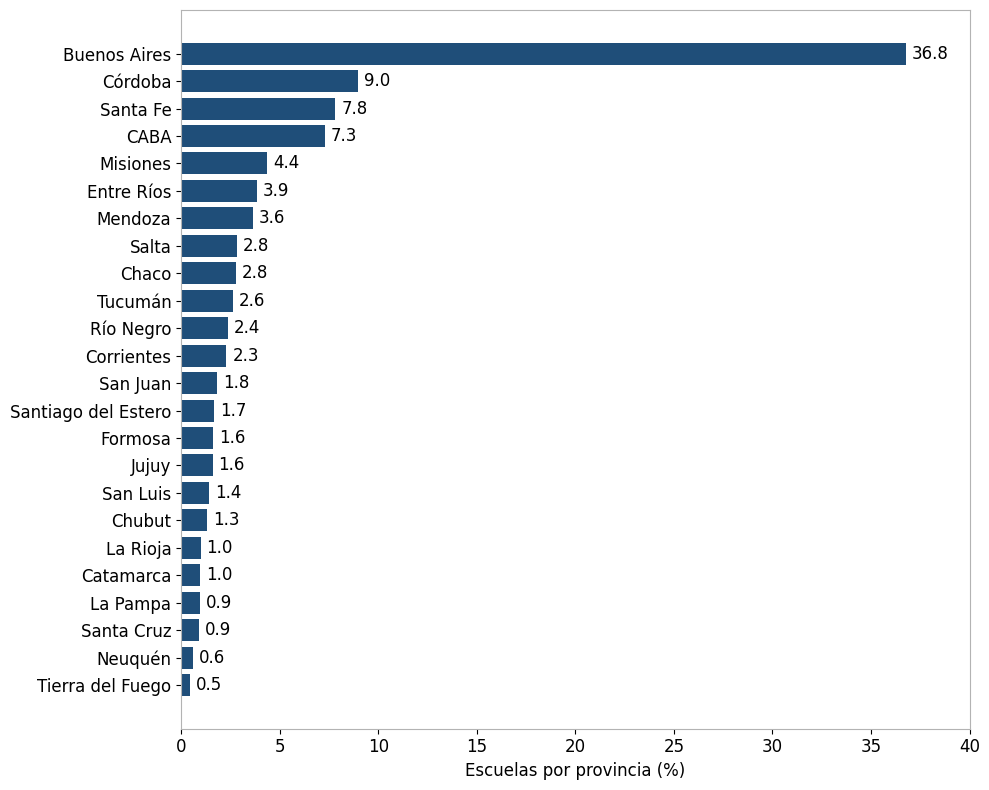

In [23]:
COLOR_BLUE_MAIN = "#1F4E79"  
COLOR_GRAY_SPINE = "#b3b3b3"

fig, ax = plt.subplots(figsize=(10, 8))
bars = plt.barh(
    df1["jurisdiccion"],
    df1["participacion_provincia"],
    color=COLOR_BLUE_MAIN
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.3,
        bar.get_y() + bar.get_height()/2,
        f"{width:.1f}",
        va='center', ha='left', fontsize=12
    )

plt.xlabel("Escuelas por provincia (%)", fontsize=12)
plt.ylabel("")
plt.xlim(0,40)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.gca().invert_yaxis()
ax.grid(False)
plt.tight_layout()


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(COLOR_GRAY_SPINE)   
    spine.set_linewidth(0.8)    

plt.show()

In [24]:
# Sector
df2=df_colegios_matematica_y_lengua.groupby('sector')['ID1'].nunique().reset_index()
df2["participacion_sector"] = (df2["ID1"] / df2["ID1"].sum() * 100).round(1)
df2=df2.sort_values(by='participacion_sector', ascending=False)

In [25]:
df2.loc[df2["sector"] == 1, "sector"] = "Estatal"
df2.loc[df2["sector"] == 0, "sector"] = "Privado"

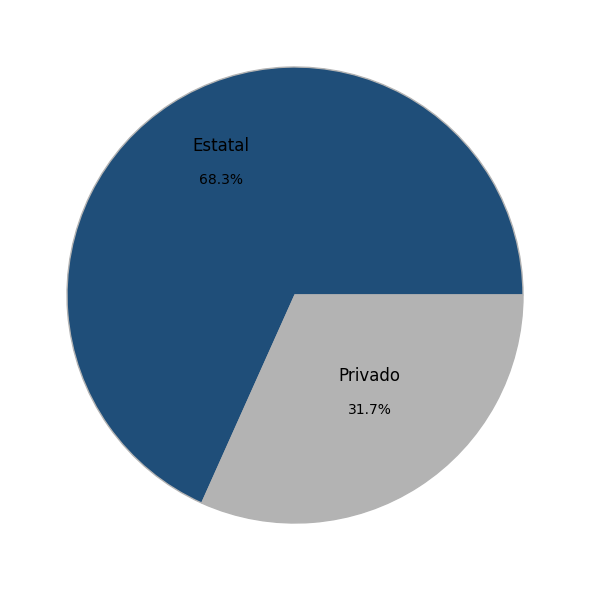

In [26]:
plt.figure(figsize=(12, 6))

colors = [COLOR_BLUE_MAIN, COLOR_GRAY_SPINE]

# Pie chart 
wedges, texts, autotexts = plt.pie(
    df2["participacion_sector"],
    labels=None,
    colors=colors,
    autopct="%1.1f%%",
    wedgeprops={"edgecolor": COLOR_GRAY_SPINE, "linewidth": 1},
    textprops={"fontsize": 10}
)

# Agregar etiquetas personalizadas arriba de cada porción
labels = ["Estatal", "Privado"]
for i, (w, label) in enumerate(zip(wedges, labels)):
    ang = (w.theta2 + w.theta1) / 2       # ángulo medio del sector
    x = np.cos(np.deg2rad(ang)) * 0.6     # posición horizontal
    y = np.sin(np.deg2rad(ang)) * 0.6     # posición vertical
    plt.text(x, y + 0.15, label, ha="center", va="center", fontsize=12, color="black")

# Recuadro gris claro
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color("#b3b3b3")
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()





#### Desempeño de los colegios, total, por provincia, público/privado dos categóricas y cantidad de alumnos

In [28]:
df3 = df_colegios_matematica_y_lengua.copy()
df3["porcentaje_satisfactorio"] = pd.to_numeric(df3["porcentaje_satisfactorio"], errors="coerce")
df3.loc[df3["jurisdiccion"] == "Ciudad Autónoma de Buenos Aires", "jurisdiccion"] = "CABA"
df3.loc[df3["jurisdiccion"] == "Tierra del Fuego, Antártida e Islas del Atlántico Sur", "jurisdiccion"] = "Tierra del Fuego"
df3.loc[df3["sector"] == 1, "sector"] = "Estatal"
df3.loc[df3["sector"] == 0, "sector"] = "Privado"


df3["porcentaje_satisfactorio"] = df3["porcentaje_satisfactorio"] * 100


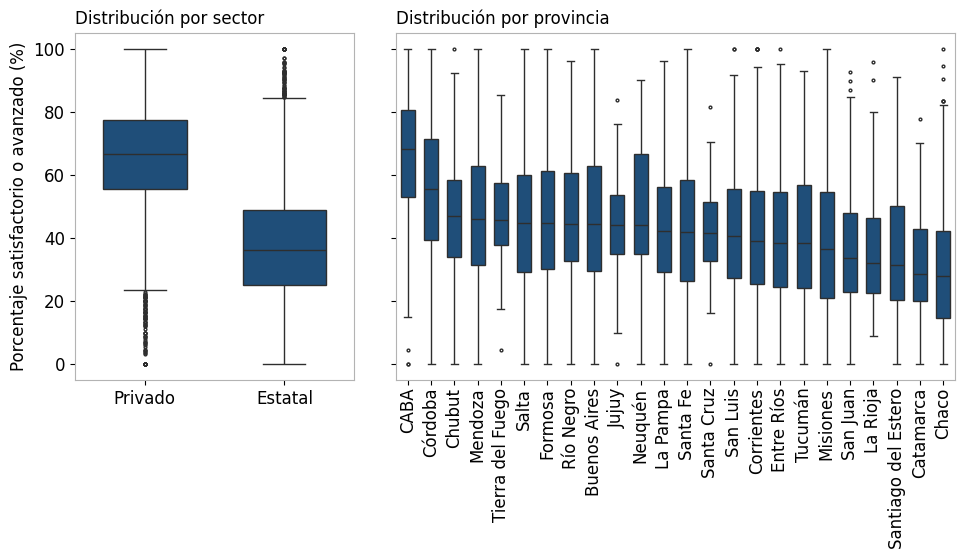

In [29]:
# --- FIGURA: 1 fila, 2 columnas, distinto ancho, mismo eje Y ---
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 6.2),                
    sharey=True,
    gridspec_kw={"width_ratios": [2, 4]}  # <- sector angosto, provincia ancho
)

# Márgenes fijos (clave)
fig.subplots_adjust(left=0.10, right=0.98, top=0.92, bottom=0.36, wspace=0.1)

# --- 1) Boxplot por SECTOR ---
order_sector = (
    df3.groupby("sector")["porcentaje_satisfactorio"]
      .median()
      .sort_values(ascending=False)
      .index
)

sns.boxplot(
    data=df3,
    x="sector", y="porcentaje_satisfactorio",
    order=order_sector,
    color=COLOR_BLUE_MAIN,
    saturation=1,
    fliersize=2, width=0.6,
    ax=ax1,
    orient="v"
)

ax1.set_title("Distribución por sector", loc="left", fontsize=12)
ax1.set_xlabel("")
ax1.set_ylabel("Porcentaje satisfactorio o avanzado (%)", fontsize=12)
ax1.tick_params(axis="x", rotation=0, labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax1.grid(False)

for s in ax1.spines.values():
    s.set_color("#b3b3b3"); s.set_linewidth(0.8)

# --- 2) Boxplot por PROVINCIA ---
order_prov = (
    df3.groupby("jurisdiccion")["porcentaje_satisfactorio"]
      .median()
      .sort_values(ascending=False)
      .index
)

sns.boxplot(
    data=df3,
    x="jurisdiccion", y="porcentaje_satisfactorio",
    order=order_prov,
    color=COLOR_BLUE_MAIN,
    saturation=1,
    fliersize=2, width=0.6,
    ax=ax2,
    orient="v"
)

ax2.set_title("Distribución por provincia", loc="left", fontsize=12)
ax2.set_xlabel("")
ax2.set_ylabel("")  # sharey=True
ax2.tick_params(axis="x", rotation=90, labelsize=12, pad=2)
ax2.tick_params(axis="y", labelsize=12)
ax2.grid(False)

for s in ax2.spines.values():
    s.set_color("#b3b3b3"); s.set_linewidth(0.8)



**Tamaño**

In [30]:
df4=df_colegios_matematica_y_lengua.copy()
df4["tamano"] = pd.qcut(df4["numero_alumnos"], q=3, labels=["Chico", "Mediano", "Grande"])

In [27]:
df4.groupby("tamano")[['numero_alumnos','porcentaje_satisfactorio']].mean().round(2)

,numero_alumnos,porcentaje_satisfactorio
tamano,,
Chico,20.96,46.73
Mediano,46.02,46.96
Grande,86.03,44.82


**Clima escolar**

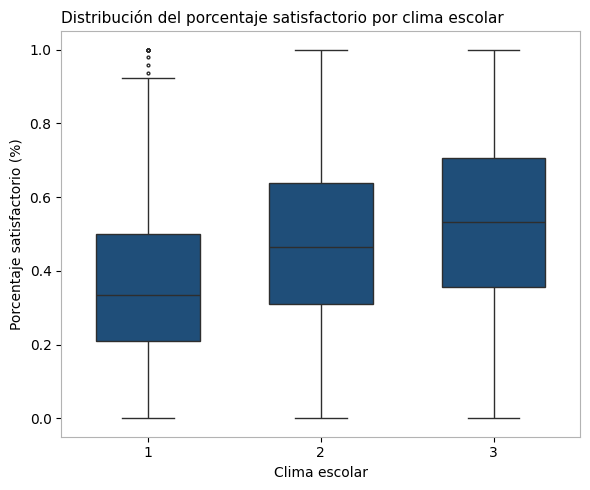

In [32]:
df5= df4.copy()

# Ordenar tamaños según la mediana del porcentaje satisfactorio
order = [1,2,3]
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(
    data=df5,
    x="clima_escolar", y="porcentaje_satisfactorio",
    order=order,
    color=COLOR_BLUE_MAIN,
    saturation=1,
    fliersize=2, width=0.6,
    ax=ax,
    orient='v'
)

ax.set_xlabel("Clima escolar", fontsize=10)
ax.set_ylabel("Porcentaje satisfactorio (%)", fontsize=10)
ax.set_title("Distribución del porcentaje satisfactorio por clima escolar", loc="left", fontsize=11)
ax.ticklabel_format(style='plain', axis='y')
# Spines gris claro
for s in ax.spines.values():
    s.set_color("#b3b3b3")
    s.set_linewidth(0.8)

plt.tight_layout()
plt.show()


#### Correlación desempeño de los colegios con variables numéricas

In [33]:
# Seleccionar columnas numéricas
num_cols = df_colegios_matematica_y_lengua.select_dtypes(include='number').columns

# Eliminar sector, clima escolar y las del grupo de directores, que como hay solo 1 director son categóricas

excluir = {"sector", "clima_escolar", "jurisdiccion"}  # lo que no querés
num_cols = [
    c for c in df_colegios_matematica_y_lengua.select_dtypes(include="number").columns
    if (c not in excluir) and (not c.lower().startswith("dp"))
]

# Calcular correlaciones de Pearson con 'porcentaje_satisfactorio'
corr_pearson = (
    df4[num_cols]
    .corr(method='pearson')['porcentaje_satisfactorio']
    .drop(labels=['porcentaje_satisfactorio'], errors='ignore')
    .sort_values(ascending=False)
)

# Top 20 positivas y top 20 negativas
top_pos = corr_pearson.head(10)
top_neg = corr_pearson.tail(10)

# Unir en un solo DataFrame
df_corr = pd.concat([top_pos, top_neg]).reset_index()
df_corr.columns = ["variable", "correlacion"]

# Mostrar
df_corr=df_corr.merge(df_variables[['variable_a_nivel_colegio','Nombre reducido','desc_respuesta']], left_on='variable', right_on='variable_a_nivel_colegio',how='left')

df_corr_copy=df_corr.copy()

In [34]:
df_corr=df_corr[[ 'Nombre reducido', 'desc_respuesta', 'correlacion']]

In [35]:
df_corr.rename(columns={'Nombre reducido':'Pregunta', 'desc_respuesta':'Respuesta'})
df_corr["correlacion"] = df_corr["correlacion"].map(lambda x: f"{x:.2f}")

In [37]:
df_corr["correlacion"] = pd.to_numeric(df_corr["correlacion"], errors="coerce")
# Positivas
df_corr_pos = df_corr[df_corr["correlacion"] > 0].sort_values("correlacion", ascending=False).reset_index(drop=True)

# Negativas
df_corr_neg = df_corr[df_corr["correlacion"] < 0].sort_values("correlacion", ascending=True).reset_index(drop=True)


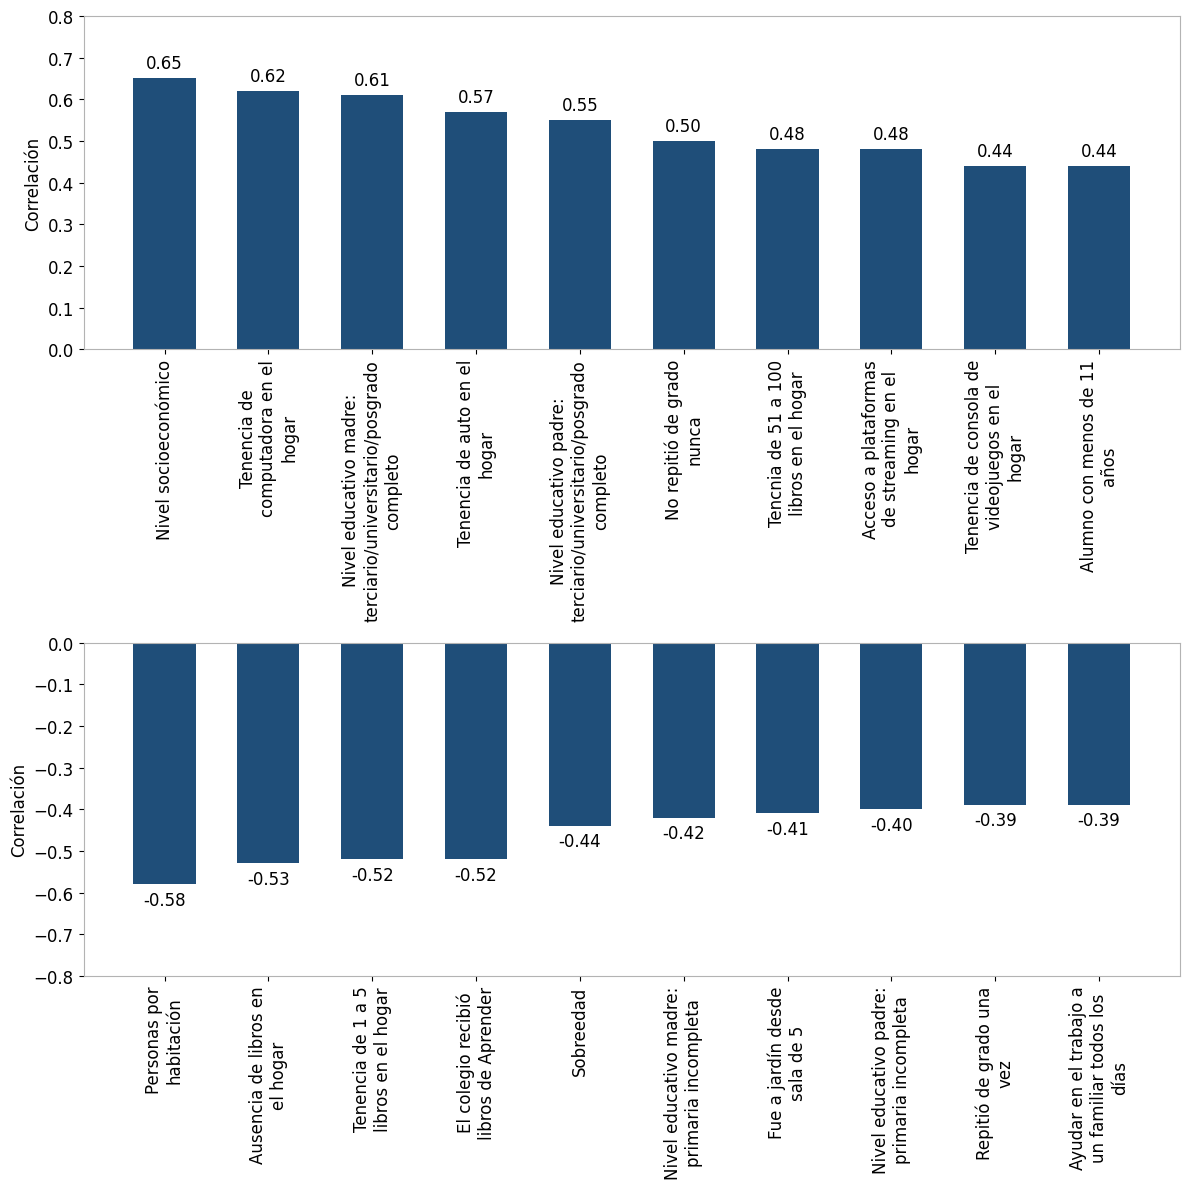

In [39]:
COLOR_SPINE="#b3b3b3"

df_corr_neg['etiqueta_reducida']=['Personas por habitación', 'Ausencia de libros en el hogar', 'Tenencia de 1 a 5 libros en el hogar', 'El colegio recibió libros de Aprender', 'Sobreedad','Nivel educativo madre: primaria incompleta', 'Fue a jardín desde sala de 5','Nivel educativo padre: primaria incompleta','Repitió de grado una vez','Ayudar en el trabajo a un familiar todos los días']
df_corr_pos['etiqueta_reducida']=['Nivel socioeconómico', 'Tenencia de computadora en el hogar','Nivel educativo madre: terciario/universitario/posgrado completo', 'Tenencia de auto en el hogar', 'Nivel educativo padre: terciario/universitario/posgrado completo', 'No repitió de grado nunca', 'Tencnia de 51 a 100 libros en el hogar','Acceso a plataformas de streaming en el hogar', 'Tenencia de consola de videojuegos en el hogar', 'Alumno con menos de 11 años']

def wrap_series(s, width=22):
    return s.apply(lambda x: "\n".join(
        textwrap.wrap(
            str(x),
            width=width,
            break_long_words=False,
            break_on_hyphens=False
        )
    ))

df_corr_pos["etiqueta_wrapped"] = wrap_series(df_corr_pos["etiqueta_reducida"])
df_corr_neg["etiqueta_wrapped"] = wrap_series(df_corr_neg["etiqueta_reducida"])

df_corr_pos = df_corr_pos.sort_values("correlacion", ascending=False)
df_corr_neg = df_corr_neg.sort_values("correlacion", ascending=True)

# === Figura con 2 filas (mismas proporciones que tus boxplots) ===
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 12), sharex=False, sharey=False)

# ---- 1) Positivas ----
ax1.bar(
    df_corr_pos["etiqueta_wrapped"],
    df_corr_pos["correlacion"],
    color=COLOR_BLUE_MAIN,
    width=0.6
)
# valores encima de cada barra
for i, v in enumerate(df_corr_pos["correlacion"]):
    ax1.text(i, v + 0.015, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

#ax1.set_title("Factores con correlación positiva con el desempeño", loc="left", fontsize=14)
ax1.set_ylabel("Correlación", fontsize=12)
ax1.set_xlabel("")
ax1.tick_params(axis='x', rotation=90, labelsize=12)  # 0° porque hay saltos de línea
ax1.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 0.8)

ax1.grid(False)
for s in ax1.spines.values():
    s.set_color(COLOR_SPINE); s.set_linewidth(0.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ---- 2) Negativas ----
ax2.bar(
    df_corr_neg["etiqueta_wrapped"],
    df_corr_neg["correlacion"],
    color=COLOR_BLUE_MAIN,
    width=0.6
)
# valores debajo del extremo de cada barra
for i, v in enumerate(df_corr_neg["correlacion"]):
    ax2.text(i, v - 0.015, f"{v:.2f}", ha='center', va='top', fontsize=12)

#ax2.set_title("Factores con correlación negativa con el desempeño", loc="left", fontsize=14)
ax2.set_ylabel("Correlación", fontsize=12)
ax2.set_xlabel("")
ax2.tick_params(axis='x', rotation=90, labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_ylim(-0.8, 0)

ax2.grid(False)
for s in ax2.spines.values():
    s.set_color(COLOR_SPINE); s.set_linewidth(0.8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# ====== Recuadro gris (activado para ambos ejes) ======
def apply_gray_box(ax):
    for side in ["top", "bottom", "left", "right"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color(COLOR_SPINE)
        ax.spines[side].set_linewidth(0.8)

        
apply_gray_box(ax1)
apply_gray_box(ax2)


plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

#### Estadísticas trabajo/actividades

In [40]:
lena="Actividades: buscar leña"
trabajar_no_familiar="Actividades:trabajar para no familiar"
cuidar_familiar="Actividades: cuidar a familiar"
cultivar_cosechar="Actividades: cultivar, cosechar, etc"
cuidar_no_familiar="Actividades: cuidar a no familiar "
trabajar_familiar="Actividades: ayudar en trabajo a familiar"
tareas_hogar="Actividades: tareas del hogar"

In [43]:
df6=df_colegios_matematica_y_lengua.copy()

lista_final_ids = np.load("../outputs/lista_final_ids.npy")
df6=df6.loc[df6['ID1'].isin(lista_final_ids)]

p33 = np.percentile(df6["NSE_puntaje"], 33) 
p90 = np.percentile(df6["NSE_puntaje"], 90)

# Función para clasificar según percentiles
def clasificar_nse(puntaje):
    if puntaje <= p33:
        return "bajo"
    elif puntaje >= p90:
        return "alto"
    else:
        return "medio"

# Aplicar al DataFrame
df6["NSE_nivel_grupo"] = df6["NSE_puntaje"].apply(clasificar_nse)

In [45]:
#### CUIDAR a un familiar
cols = ["ap06a_1_pct", "ap06a_2_pct", "ap06a_3_pct", "ap06a_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap06a_1_pct": "No realicé esta tarea",
    "ap06a_2_pct": "Algunos días",
    "ap06a_3_pct": "De lunes a viernes",
    "ap06a_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE
tabla_nse = tabla_nse.sort_index()

print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==cuidar_familiar])
print("")
print("La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cuidar a un familiar]")
display(tabla_nse)

Correlación:                    Nombre reducido  desc_respuesta  correlacion
11  Actividades: cuidar a familiar  Todos los días        -0.39

La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cuidar a un familiar]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,58.9,27.4,1.8,11.9
bajo,41.1,32.1,3.9,22.9
medio,48.5,30.5,3.2,17.8


In [46]:
#### CUIDAR a un no familiar
cols = ["ap06b_1_pct", "ap06b_2_pct", "ap06b_3_pct", "ap06b_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap06b_1_pct": "No realicé esta tarea",
    "ap06b_2_pct": "Algunos días",
    "ap06b_3_pct": "De lunes a viernes",
    "ap06b_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE 
tabla_nse = tabla_nse.sort_index()


print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==cuidar_no_familiar])
print("")
print("La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cuidar a una persona no familiar]")
display(tabla_nse)

Correlación: Empty DataFrame
Columns: [Nombre reducido, desc_respuesta, correlacion]
Index: []

La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cuidar a una persona no familiar]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,82.8,11.7,2.0,3.4
bajo,77.6,15.1,2.5,4.8
medio,81.2,12.7,2.2,4.0


In [47]:
#### Colaborar tareas hogar
cols = ["ap06c_1_pct", "ap06c_2_pct", "ap06c_3_pct", "ap06c_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap06c_1_pct": "No realicé esta tarea",
    "ap06c_2_pct": "Algunos días",
    "ap06c_3_pct": "De lunes a viernes",
    "ap06c_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE 
tabla_nse = tabla_nse.sort_index()

print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==tareas_hogar])
print("")
print("La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Realizar distintas tareas como limpiar, lavar platos o ropa, cocinar, hacer las compras, cuidar animales domésticos, etc.]")
display(tabla_nse)

Correlación: Empty DataFrame
Columns: [Nombre reducido, desc_respuesta, correlacion]
Index: []

La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Realizar distintas tareas como limpiar, lavar platos o ropa, cocinar, hacer las compras, cuidar animales domésticos, etc.]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,15.6,56.9,7.9,19.6
bajo,15.7,47.3,8.8,28.2
medio,13.9,52.2,9.0,24.9


In [50]:
#### [Buscar agua o leña fuera de casa]
cols = ["ap06d_1_pct", "ap06d_2_pct", "ap06d_3_pct", "ap06d_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap06d_1_pct": "No realicé esta tarea",
    "ap06d_2_pct": "Algunos días",
    "ap06d_3_pct": "De lunes a viernes",
    "ap06d_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE 
tabla_nse = tabla_nse.sort_index()

print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==lena])
print("")
print("La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Buscar agua o leña fuera de casa]")
display(tabla_nse)



Correlación: Empty DataFrame
Columns: [Nombre reducido, desc_respuesta, correlacion]
Index: []

La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Buscar agua o leña fuera de casa]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,88.2,10.1,0.7,1.0
bajo,70.6,20.9,2.5,6.0
medio,81.6,14.1,1.4,2.9


In [51]:
#### Cultivar o cosechar en la huerta, ordeñar o cuidar animales de granja o campo para consumir]
cols = ["ap06e_1_pct", "ap06e_2_pct", "ap06e_3_pct", "ap06e_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap06e_1_pct": "No realicé esta tarea",
    "ap06e_2_pct": "Algunos días",
    "ap06e_3_pct": "De lunes a viernes",
    "ap06e_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE 
tabla_nse = tabla_nse.sort_index()

print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==cultivar_cosechar])
print("")
print("La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cultivar o cosechar en la huerta, ordeñar o cuidar animales de granja o campo para consumir]")
display(tabla_nse)


Correlación: Empty DataFrame
Columns: [Nombre reducido, desc_respuesta, correlacion]
Index: []

La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cultivar o cosechar en la huerta, ordeñar o cuidar animales de granja o campo para consumir]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,89.7,8.3,0.6,1.4
bajo,75.1,15.1,2.9,6.9
medio,84.2,10.9,1.5,3.4


In [52]:
#### Durante la semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Ayudar en el trabajo a familiares]
cols = ["ap07a_1_pct", "ap07a_2_pct", "ap07a_3_pct", "ap07a_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap07a_1_pct": "No realicé esta tarea",
    "ap07a_2_pct": "Algunos días",
    "ap07a_3_pct": "De lunes a viernes",
    "ap07a_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE 
tabla_nse = tabla_nse.sort_index()



print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==trabajar_familiar])
print("")
print("Durante la semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Ayudar en el trabajo a familiares]")
display(tabla_nse)


Correlación:                               Nombre reducido  desc_respuesta  correlacion
10  Actividades: ayudar en trabajo a familiar  Todos los días        -0.39

Durante la semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Ayudar en el trabajo a familiares]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,52.3,37.3,3.8,6.7
bajo,36.8,40.5,5.7,17.0
medio,42.2,41.4,4.7,11.7


In [53]:
#### Durante la semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Trabajar para una persona no familiar]
cols = ["ap07b_1_pct", "ap07b_2_pct", "ap07b_3_pct", "ap07b_4_pct"]

# Calcular promedios por nivel socioeconómico
tabla_nse = (
    df6
    .groupby("NSE_nivel_grupo")[cols]
    .mean() * 100
)

# Renombrar las columnas con los textos de las opciones
tabla_nse = tabla_nse.rename(columns={
    "ap07b_1_pct": "No realicé esta tarea",
    "ap07b_2_pct": "Algunos días",
    "ap07b_3_pct": "De lunes a viernes",
    "ap07b_4_pct": "Todos los días"
})

# Redondear los valores
tabla_nse = tabla_nse.round(1)

# Mostrar tabla ordenada por NSE (si querés mantener un orden lógico)
tabla_nse = tabla_nse.sort_index()


print('Correlación:', df_corr.loc[df_corr['Nombre reducido']==trabajar_no_familiar])
print("")
print("Durante la semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Trabajar para una persona no familiar]")
display(tabla_nse)

Correlación: Empty DataFrame
Columns: [Nombre reducido, desc_respuesta, correlacion]
Index: []

Durante la semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Trabajar para una persona no familiar]


,No realicé esta tarea,Algunos días,De lunes a viernes,Todos los días
NSE_nivel_grupo,,,,
alto,92.5,5.9,0.9,0.7
bajo,83.8,11.6,2.1,2.5
medio,89.4,8.0,1.2,1.4


#### Exploración categóricas

In [55]:
df_variables.loc[df_variables['variable']=='dp48c']['variable_a_nivel_colegio'].unique()

array(['dp48c_1.0', 'dp48c_2.0', 'dp48c_3.0'], dtype=object)

##### Directores

In [56]:
#Factores que afectan los procesos de aprendizaje y enseñanza
#dp48c
#dp48e
#dp48a
#dp48g
#dp48j
#dp48b
#dp48d
#dp48f

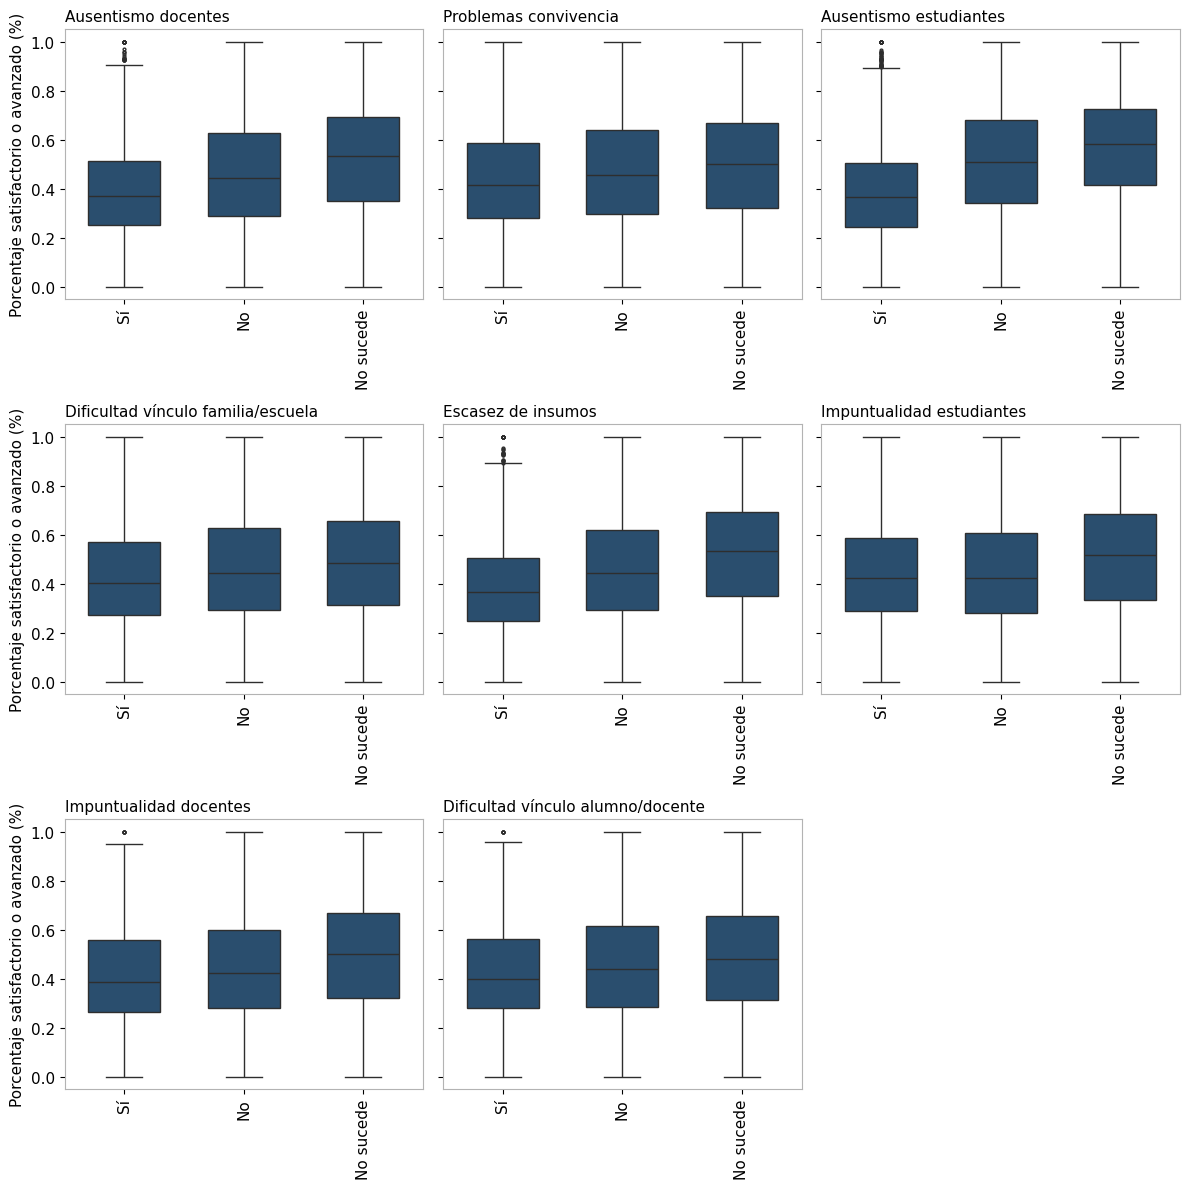

In [58]:
bloques = ["dp48c", "dp48e", "dp48a", "dp48g", "dp48j", "dp48b", "dp48d", "dp48f"]
cols = 3

# Figura y ejes
n = len(bloques)
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(12,12))
axes = axes.ravel()

for i, (ax, base) in enumerate(zip(axes, bloques)):
   
    m_nom = df_variables.loc[df_variables["variable"] == base, "Nombre reducido"]
    if len(m_nom):
        nombre_reducido = m_nom.iloc[0].replace("Factor negativo: ", "").strip()
    else:
        nombre_reducido = base

    
    tmp = df_variables.loc[
        df_variables["variable"] == base,
        ["variable_a_nivel_colegio", "respuesta", "desc_respuesta"]
    ].dropna(subset=["variable_a_nivel_colegio"])

    if "respuesta" in tmp.columns:
        tmp = tmp.sort_values("respuesta")

    cols_dummy = tmp["variable_a_nivel_colegio"].tolist()
    labels = tmp["desc_respuesta"].fillna(tmp["variable_a_nivel_colegio"]).tolist()

    # ---- Construir datos: usar % satisfactorio solo cuando dummy == 1 ----
    data = []
    for c, lab in zip(cols_dummy, labels):
        if c in df_colegios_matematica_y_lengua.columns:
            s = df_colegios_matematica_y_lengua.loc[
                df_colegios_matematica_y_lengua[c] == 1, "porcentaje_satisfactorio"
            ]
            if not s.empty:
                data.append(pd.DataFrame({"categoria": lab, "porcentaje_satisfactorio": s}))

    # ---- Graficar ----
    if data:
        df_box = pd.concat(data, ignore_index=True)

        sns.boxplot(
            data=df_box, x="categoria", y="porcentaje_satisfactorio",
            color=COLOR_BLUE_MAIN, width=0.6, fliersize=2, ax=ax
        )

        ax.set_xlabel("")

        # Mostrar etiqueta del eje Y solo en la primera columna
        col = i % cols
        if col == 0:
            ax.set_ylabel("Porcentaje satisfactorio o avanzado (%)", fontsize=11)
        else:
            ax.set_ylabel("")
            ax.tick_params(axis='y', labelleft=False)   # ← oculta etiquetas Y

        ax.set_title(nombre_reducido, loc="left", fontsize=11)
        ax.tick_params(axis='x', rotation=90, labelsize=11)
        ax.tick_params(axis='y', labelsize=11)

        # Spines gris claro
        for sp in ax.spines.values():
            sp.set_color("#b3b3b3")
            sp.set_linewidth(0.8)
    else:
        ax.set_title(f"{nombre_reducido}\n(sin datos)", loc="left", fontsize=11)
        ax.axis("off")


for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [59]:
# Crear lista para almacenar resúmenes
resumenes = []

for base in bloques:
    # ---- Nombre reducido ----
    m_nom = df_variables.loc[df_variables["variable"] == base, "Nombre reducido"]
    nombre_reducido = m_nom.iloc[0] if len(m_nom) else base

    # ---- Obtener dummies y etiquetas ----
    tmp = df_variables.loc[
        df_variables["variable"] == base,
        ["variable_a_nivel_colegio","respuesta","desc_respuesta"]
    ].dropna(subset=["variable_a_nivel_colegio"])

    if "respuesta" in tmp.columns:
        tmp = tmp.sort_values("respuesta")

    cols_dummy = tmp["variable_a_nivel_colegio"].tolist()
    labels = tmp["desc_respuesta"].fillna(tmp["variable_a_nivel_colegio"]).tolist()

    # ---- Calcular promedio y n ----
    for c, lab in zip(cols_dummy, labels):
        if c in df_colegios_matematica_y_lengua.columns:
            s = df_colegios_matematica_y_lengua.loc[
                df_colegios_matematica_y_lengua[c] == 1, "porcentaje_satisfactorio"
            ]
            if not s.empty:
                resumenes.append({
                    "variable": nombre_reducido,
                    "categoria": lab,
                    "n_obs": s.count(),
                    "promedio_%_satisfactorio": s.mean().round(2)
                })

# Convertir a DataFrame resumen
df_resumen = pd.DataFrame(resumenes)

# Mostrar resultados ordenados
df_resumen = df_resumen.sort_values(["variable", "categoria"])
display(df_resumen)


,variable,categoria,n_obs,promedio_%_satisfactorio
10,Dificultad vínculo familia/escuela,No,4623,0.46
11,Dificultad vínculo familia/escuela,No sucede,3712,0.49
9,Dificultad vínculo familia/escuela,Sí,2004,0.43
1,Factor negativo: Ausentismo docentes,No,3875,0.46
2,Factor negativo: Ausentismo docentes,No sucede,3665,0.52
0,Factor negativo: Ausentismo docentes,Sí,2887,0.39
7,Factor negativo: Ausentismo estudiantes,No,2059,0.51
8,Factor negativo: Ausentismo estudiantes,No sucede,2998,0.56
6,Factor negativo: Ausentismo estudiantes,Sí,5659,0.39
22,Factor negativo: Dificultad vínculo alumno/doc...,No,4573,0.45


In [60]:
# Pivotear para tener una columna por categoría
df_pivot = df_resumen.pivot(index="variable", columns="categoria", values="promedio_%_satisfactorio")

# Calcular diferencias
df_pivot["dif_Si_No"] = df_pivot["Sí"] - df_pivot["No"]
df_pivot["dif_Si_No_sucede"] = df_pivot["Sí"] - df_pivot["No sucede"]

df_pivot.sort_values(by='dif_Si_No', ascending=True)

categoria,No,No sucede,Sí,dif_Si_No,dif_Si_No_sucede
variable,,,,,
Factor negativo: Ausentismo estudiantes,0.51,0.56,0.39,-0.12,-0.17
Factor negativo: Ausentismo docentes,0.46,0.52,0.39,-0.07,-0.13
Factor negativo: Escasez de insumos,0.46,0.52,0.39,-0.07,-0.13
Dificultad vínculo familia/escuela,0.46,0.49,0.43,-0.03,-0.06
Factor negativo: Dificultad vínculo alumno/docente,0.45,0.49,0.42,-0.03,-0.07
Factor negativo: Problemas convivencia,0.47,0.50,0.44,-0.03,-0.06
Factor negativo: Impuntualidad docentes,0.44,0.50,0.42,-0.02,-0.08
Factor negativo: Impuntualidad estudiantes,0.45,0.51,0.44,-0.01,-0.07


In [61]:
bloques = ["dp48c","dp48e","dp48a","dp48g","dp48j","dp48b","dp48d","dp48f"]

conteos = []

for base in bloques:
    # Nombre reducido (fallback si no existe)
    m_nom = df_variables.loc[df_variables["variable"] == base, "Nombre reducido"]
    nombre_reducido = m_nom.iloc[0] if len(m_nom) else base

    # Obtener dummies y etiquetas
    tmp = df_variables.loc[
        df_variables["variable"] == base,
        ["variable_a_nivel_colegio","respuesta","desc_respuesta"]
    ].dropna(subset=["variable_a_nivel_colegio"])

    if "respuesta" in tmp.columns:
        tmp = tmp.sort_values("respuesta")

    cols_dummy = tmp["variable_a_nivel_colegio"].tolist()
    labels = tmp["desc_respuesta"].fillna(tmp["variable_a_nivel_colegio"]).tolist()

    # Contar dummy == 1 y calcular promedio del % satisfactorio
    for c, lab in zip(cols_dummy, labels):
        if c in df_colegios_matematica_y_lengua.columns:
            mask = df_colegios_matematica_y_lengua[c] == 1
            subset = df_colegios_matematica_y_lengua.loc[mask, "porcentaje_satisfactorio"]
            conteos.append({
                "bloque": base,
                "Nombre reducido": nombre_reducido,
                "categoria": lab,
                "dummy_col": c,
                "conteo_dummy_1": int(mask.sum()),
                "promedio_%_satisfactorio": subset.mean() if not subset.empty else None
            })

# Crear DataFrame final con los conteos y promedios
df_problematicas = pd.DataFrame(conteos).sort_values(["bloque","categoria"]).reset_index(drop=True).round(2)
df_problematicas

,bloque,Nombre reducido,categoria,dummy_col,conteo_dummy_1,promedio_%_satisfactorio
0,dp48a,Factor negativo: Ausentismo estudiantes,No,dp48a_2.0,2059,0.51
1,dp48a,Factor negativo: Ausentismo estudiantes,No sucede,dp48a_3.0,2998,0.56
2,dp48a,Factor negativo: Ausentismo estudiantes,Sí,dp48a_1.0,5659,0.39
3,dp48b,Factor negativo: Impuntualidad estudiantes,No,dp48b_2.0,4001,0.45
4,dp48b,Factor negativo: Impuntualidad estudiantes,No sucede,dp48b_3.0,3232,0.51
5,dp48b,Factor negativo: Impuntualidad estudiantes,Sí,dp48b_1.0,3072,0.44
6,dp48c,Factor negativo: Ausentismo docentes,No,dp48c_2.0,3875,0.46
7,dp48c,Factor negativo: Ausentismo docentes,No sucede,dp48c_3.0,3665,0.52
8,dp48c,Factor negativo: Ausentismo docentes,Sí,dp48c_1.0,2887,0.39
9,dp48d,Factor negativo: Impuntualidad docentes,No,dp48d_2.0,4466,0.44


In [62]:
#Horas de clase
#dp47
#Arnigüedad cargo director
#dp06c


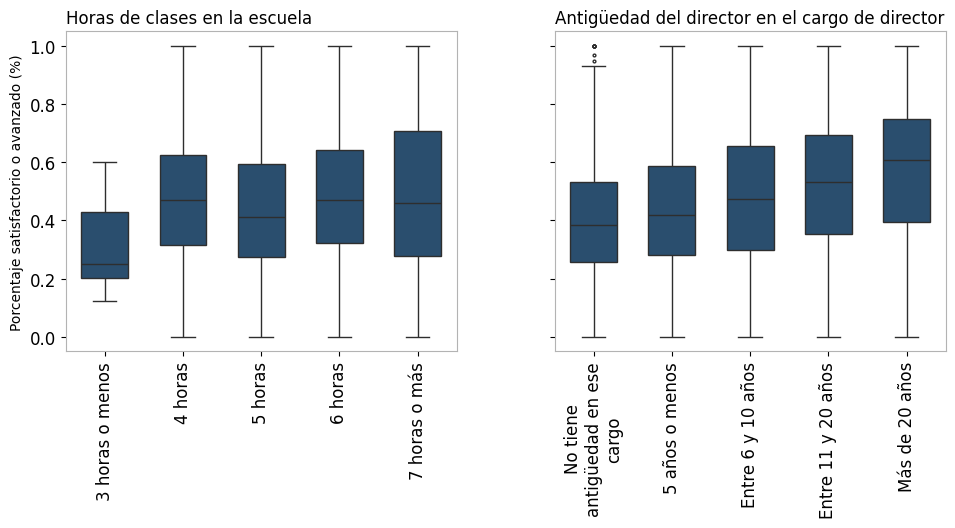

In [64]:
def wrap_label(txt, width=18):
    return "\n".join(textwrap.wrap(str(txt), width=width, break_long_words=False, break_on_hyphens=False))

bloques = ["dp47", "dp06b"]

# --- FIGURA: 1 fila, 2 columnas (lado a lado), mismo tamaño que tu ejemplo ---
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5),
    sharey=True,
    gridspec_kw={"width_ratios": [1, 1]}
)
axes = axes.ravel()

# Márgenes fijos (igual lógica que tu formato “boxplot”)
fig.subplots_adjust(left=0.10, right=0.98, top=0.92, bottom=0.28, wspace=0.25)

for i, (ax, base) in enumerate(zip(axes, bloques)):
    # Título descriptivo
    m_nom = df_variables.loc[df_variables["variable"] == base, "Nombre reducido"]
    nombre_reducido = m_nom.iloc[0] if len(m_nom) else base

    # Obtener variables dummy y etiquetas
    tmp = (
        df_variables.loc[df_variables["variable"] == base,
                         ["variable_a_nivel_colegio", "respuesta", "desc_respuesta"]]
        .dropna(subset=["variable_a_nivel_colegio"])
        .sort_values("respuesta")
    )
    cols_dummy = tmp["variable_a_nivel_colegio"].tolist()
    labels = [wrap_label(x) for x in tmp["desc_respuesta"].fillna(tmp["variable_a_nivel_colegio"]).tolist()]

    # Construir datos (solo donde dummy == 1)
    data = []
    for c, lab in zip(cols_dummy, labels):
        if c in df_colegios_matematica_y_lengua.columns:
            s = df_colegios_matematica_y_lengua.loc[
                df_colegios_matematica_y_lengua[c] == 1, "porcentaje_satisfactorio"
            ]
            if not s.empty:
                data.append(pd.DataFrame({"categoria": lab, "porcentaje_satisfactorio": s}))

    if data:
        df_box = pd.concat(data, ignore_index=True)
        sns.boxplot(
            data=df_box, x="categoria", y="porcentaje_satisfactorio",
            color=COLOR_BLUE_MAIN, width=0.6, fliersize=2, ax=ax
        )

        ax.set_xlabel("")
        ax.set_ylabel("Porcentaje satisfactorio o avanzado (%)" if i == 0 else "")
        ax.tick_params(axis="x", rotation=90, labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        ax.set_title(nombre_reducido, loc="left", fontsize=12)
        ax.grid(False)

        for sp in ax.spines.values():
            sp.set_color("#b3b3b3")
            sp.set_linewidth(0.8)
    else:
        ax.set_title(f"{nombre_reducido}\n(sin datos)", loc="left", fontsize=12)
        ax.axis("off")

# Títulos finales (si querés forzarlos a estos textos)
axes[0].set_title("Horas de clases en la escuela", loc="left", fontsize=12)
axes[1].set_title("Antigüedad del director en el cargo de director", loc="left", fontsize=12)

plt.show()



In [65]:
# ---- Calcular resumen de promedios y observaciones ----
resumenes = []

for base in bloques:
    # Nombre reducido
    m_nom = df_variables.loc[df_variables["variable"] == base, "Nombre reducido"]
    nombre_reducido = m_nom.iloc[0] if len(m_nom) else base

    # Obtener dummies y etiquetas
    tmp = df_variables.loc[
        df_variables["variable"] == base,
        ["variable_a_nivel_colegio", "respuesta", "desc_respuesta"]
    ].dropna(subset=["variable_a_nivel_colegio"])

    if "respuesta" in tmp.columns:
        tmp = tmp.sort_values("respuesta")

    cols_dummy = tmp["variable_a_nivel_colegio"].tolist()
    labels = tmp["desc_respuesta"].fillna(tmp["variable_a_nivel_colegio"]).tolist()

    # Calcular promedio y cantidad de observaciones por categoría
    for c, lab in zip(cols_dummy, labels):
        if c in df_colegios_matematica_y_lengua.columns:
            s = df_colegios_matematica_y_lengua.loc[
                df_colegios_matematica_y_lengua[c] == 1, "porcentaje_satisfactorio"
            ]
            if not s.empty:
                resumenes.append({
                    "variable": nombre_reducido,
                    "categoria": lab,
                    "n_obs": s.count(),
                    "promedio_%_satisfactorio": s.mean().round(2)
                })

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumenes).sort_values(["variable", "categoria"])

# Mostrar resultados
display(df_resumen)



,variable,categoria,n_obs,promedio_%_satisfactorio
6,Antigüedad cargo director,5 años o menos,5616,0.44
8,Antigüedad cargo director,Entre 11 y 20 años,1499,0.52
7,Antigüedad cargo director,Entre 6 y 10 años,2309,0.48
9,Antigüedad cargo director,Más de 20 años,330,0.57
5,Antigüedad cargo director,No tiene antigüedad en ese cargo,1143,0.40
0,Horas en el colegio,3 horas o menos,16,0.32
1,Horas en el colegio,4 horas,3487,0.47
2,Horas en el colegio,5 horas,4416,0.44
3,Horas en el colegio,6 horas,1024,0.48
4,Horas en el colegio,7 horas o más,1955,0.48


In [66]:
conteos = []

for base in bloques:
    # Nombre reducido (fallback si no existe)
    m_nom = df_variables.loc[df_variables["variable"] == base, "Nombre reducido"]
    nombre_reducido = m_nom.iloc[0] if len(m_nom) else base

    # Obtener dummies y etiquetas
    tmp = df_variables.loc[
        df_variables["variable"] == base,
        ["variable_a_nivel_colegio","respuesta","desc_respuesta"]
    ].dropna(subset=["variable_a_nivel_colegio"])

    if "respuesta" in tmp.columns:
        tmp = tmp.sort_values("respuesta")

    cols_dummy = tmp["variable_a_nivel_colegio"].tolist()
    labels = tmp["desc_respuesta"].fillna(tmp["variable_a_nivel_colegio"]).tolist()

    # Contar dummy == 1 y calcular promedio del % satisfactorio
    for c, lab in zip(cols_dummy, labels):
        if c in df_colegios_matematica_y_lengua.columns:
            mask = df_colegios_matematica_y_lengua[c] == 1
            subset = df_colegios_matematica_y_lengua.loc[mask, "porcentaje_satisfactorio"]
            conteos.append({
                "bloque": base,
                "Nombre reducido": nombre_reducido,
                "categoria": lab,
                "dummy_col": c,
                "conteo_dummy_1": int(mask.sum()),
                "promedio_%_satisfactorio": subset.mean() if not subset.empty else None
            })

# Crear DataFrame final con los conteos y promedios
df_caract_colegio = pd.DataFrame(conteos).sort_values(["bloque","categoria"]).reset_index(drop=True).round(2)
df_caract_colegio

,bloque,Nombre reducido,categoria,dummy_col,conteo_dummy_1,promedio_%_satisfactorio
0,dp06b,Antigüedad cargo director,5 años o menos,dp06b_2.0,5616,0.44
1,dp06b,Antigüedad cargo director,Entre 11 y 20 años,dp06b_4.0,1499,0.52
2,dp06b,Antigüedad cargo director,Entre 6 y 10 años,dp06b_3.0,2309,0.48
3,dp06b,Antigüedad cargo director,Más de 20 años,dp06b_5.0,330,0.57
4,dp06b,Antigüedad cargo director,No tiene antigüedad en ese cargo,dp06b_1.0,1143,0.40
5,dp47,Horas en el colegio,3 horas o menos,dp47_1.0,16,0.32
6,dp47,Horas en el colegio,4 horas,dp47_2.0,3487,0.47
7,dp47,Horas en el colegio,5 horas,dp47_3.0,4416,0.44
8,dp47,Horas en el colegio,6 horas,dp47_4.0,1024,0.48
9,dp47,Horas en el colegio,7 horas o más,dp47_5.0,1955,0.48


In [67]:
### Docentes
### Titulo docente no tiene sentido porque tienen todos
df_colegios_matematica_y_lengua["mp08_1.0"].describe()

count    11357.000000
mean         0.972998
std          0.132710
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mp08_1.0, dtype: float64

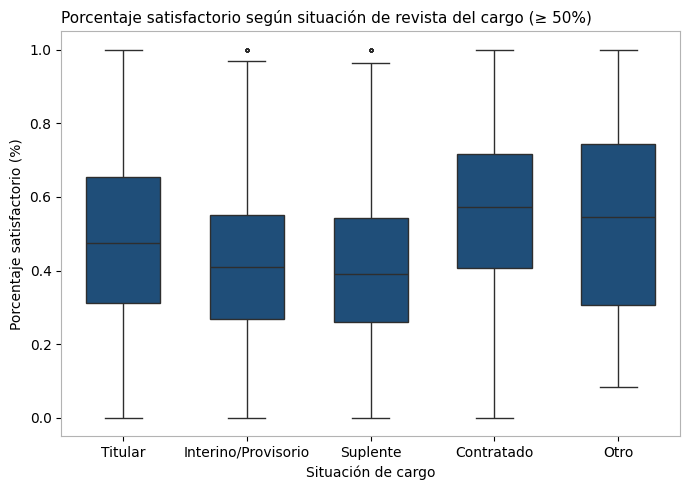

In [68]:
# Variables dummy del bloque mp06
cols_mp06 = ["mp06_1.0", "mp06_2.0", "mp06_3.0", "mp06_4.0", "mp06_5.0"]
labels_mp06 = ["Titular", "Interino/Provisorio", "Suplente", "Contratado", "Otro"]

# Crear DataFrame solo con categorías con más de la mitad (dummy >= 0.5)
data = []
for c, label in zip(cols_mp06, labels_mp06):
    subset = df_colegios_matematica_y_lengua.loc[df_colegios_matematica_y_lengua[c] >= 0.5, "porcentaje_satisfactorio"]
    if not subset.empty:
        data.append(pd.DataFrame({
            "Situación de cargo": label,
            "porcentaje_satisfactorio": subset
        }))

df_box = pd.concat(data, ignore_index=True)

# Graficar
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_box,
    x="Situación de cargo", y="porcentaje_satisfactorio",
    color=COLOR_BLUE_MAIN, width=0.6, fliersize=2, saturation=1
)

plt.title("Porcentaje satisfactorio según situación de revista del cargo (≥ 50%)", loc="left", fontsize=11)
plt.xlabel("Situación de cargo")
plt.ylabel("Porcentaje satisfactorio (%)")

# Spines gris claro
ax = plt.gca()
for s in ax.spines.values():
    s.set_color("#b3b3b3")
    s.set_linewidth(0.8)

ax.grid(False)
plt.tight_layout()
plt.show()


In [69]:
df6.groupby('NSE_nivel_grupo')['ap22_1_pct'].mean().reset_index()

,NSE_nivel_grupo,ap22_1_pct
0,alto,0.969515
1,bajo,0.793437
2,medio,0.906339


,Situación de cargo,Cantidad de colegios (>50%),Promedio % satisfactorio
0,Titular,5985,0.50
2,Suplente,1756,0.40
1,Interino/Provisorio,526,0.43
3,Contratado,79,0.52
4,Otro,15,0.56


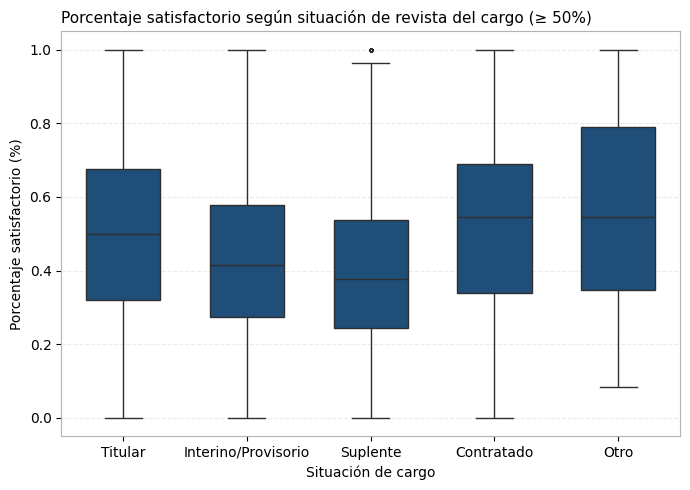

In [70]:
# Variables dummy del bloque mp06
cols_mp06 = ["mp06_1.0", "mp06_2.0", "mp06_3.0", "mp06_4.0", "mp06_5.0"]
labels_mp06 = ["Titular", "Interino/Provisorio", "Suplente", "Contratado", "Otro"]

# Crear DataFrame solo con categorías con más de la mitad (dummy >= 0.5)
data = []
resumen = []

for c, label in zip(cols_mp06, labels_mp06):
    if c in df_colegios_matematica_y_lengua.columns:
        subset = df_colegios_matematica_y_lengua.loc[
            df_colegios_matematica_y_lengua[c] > 0.5, "porcentaje_satisfactorio"
        ]
        if not subset.empty:
            # Para el boxplot
            data.append(pd.DataFrame({
                "Situación de cargo": label,
                "porcentaje_satisfactorio": subset
            }))
            # Para el resumen (conteo + promedio)
            resumen.append({
                "Situación de cargo": label,
                "Cantidad de colegios (>50%)": int(subset.shape[0]),
                "Promedio % satisfactorio": round(subset.mean(), 2)
            })

# --- DataFrames finales ---
df_box = pd.concat(data, ignore_index=True)
df_resumen = pd.DataFrame(resumen)

# --- Mostrar resumen ---
display(df_resumen.sort_values("Cantidad de colegios (>50%)", ascending=False))

# --- Gráfico ---
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_box,
    x="Situación de cargo", y="porcentaje_satisfactorio",
    color=COLOR_BLUE_MAIN, width=0.6, fliersize=2, saturation=1
)

plt.title("Porcentaje satisfactorio según situación de revista del cargo (≥ 50%)", loc="left", fontsize=11)
plt.xlabel("Situación de cargo")
plt.ylabel("Porcentaje satisfactorio (%)")
plt.grid(True, axis="y", linestyle="--", alpha=0.25)

# Spines gris claro
ax = plt.gca()
for s in ax.spines.values():
    s.set_color("#b3b3b3")
    s.set_linewidth(0.8)

plt.tight_layout()
plt.show()

## 4. Segmentación colegios

In [72]:
df7=df6.copy()

In [73]:
#Importamos la lista final de colegios que usamos
lista_final_ids = np.load("../outputs/lista_final_ids.npy")
df7=df7.loc[df7['ID1'].isin(lista_final_ids)]

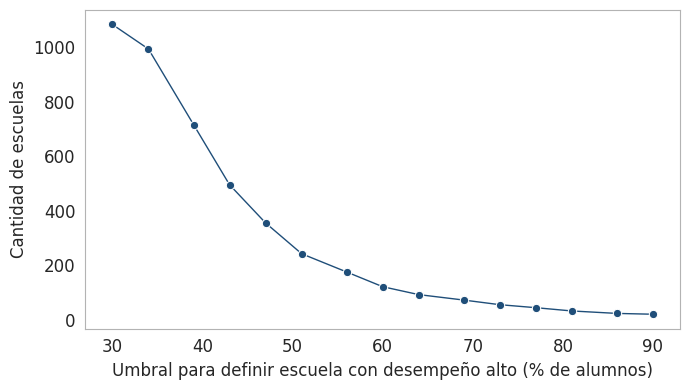

In [75]:
# segmentacipon de colegios según desempñeo
def reclasificar(data, high_cut, low_cut=0.33):
    def clasificar_percentil(valor):
        if valor < low_cut:
            return "bajo"
        elif valor > high_cut:
            return "alto"
        else:
            return "medio"

    tmp = data.copy()
    tmp["categoria_satisfactorio"] = tmp["porcentaje_satisfactorio"].apply(clasificar_percentil)
    return tmp

# Guardamos resultados para cada corte
resultados = []

# probamos cortes para "alto" entre 0.30 y 0.90 (15 valores)
for high_cut in np.linspace(0.30, 0.90, 15):  
    tmp = reclasificar(df7, high_cut=high_cut)
    count = tmp[
        (tmp["NSE_nivel_grupo"]=="bajo") & (tmp["categoria_satisfactorio"]=="alto")
    ]["ID1"].nunique()
    resultados.append({
        "umbral_alto": round(high_cut, 2),
        "colegios_NSE_bajo_satisf_alto": count
    })

# Convertimos en tabla
tabla = pd.DataFrame(resultados).reset_index()

# Estilo general
fig, ax = plt.subplots(figsize=(7,4))
sns.set_style("whitegrid")


# Gráfico de línea con formato
sns.lineplot(
    data=tabla,
     x=tabla["umbral_alto"] *100, y="colegios_NSE_bajo_satisf_alto",
    marker="o", color=COLOR_BLUE_MAIN, linewidth=1
)

# Títulos y etiquetas
#plt.title("Escuelas con NSE bajo y desempeño 'alto' según umbral de corte", 
          #loc="left", fontsize=11)
plt.xlabel("Umbral para definir escuela con desempeño alto (% de alumnos)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel("Cantidad de escuelas", fontsize=12)

# Grilla solo en eje Y, con líneas suaves
plt.grid(False, axis="y", alpha=0)
plt.grid(False, axis="x", alpha=0)
# Spines gris claro
ax = plt.gca()
for s in ax.spines.values():
    s.set_color("#b3b3b3")
    s.set_linewidth(0.8)

plt.tight_layout()
plt.show()


In [76]:
#Segmentamos por desempeño
# Crear la nueva columna con categorías
def clasificar_percentil(valor):
    if valor < 0.33:
        return "bajo"
    elif valor > 0.55:
        return "alto"
    else:
        return "medio"

df7["categoria_satisfactorio"] = df7["porcentaje_satisfactorio"].apply(clasificar_percentil)
df7.groupby('categoria_satisfactorio')['porcentaje_satisfactorio'].describe().round(2).reset_index()

,categoria_satisfactorio,count,mean,std,min,25%,50%,75%,max
0,alto,3138.0,0.71,0.11,0.55,0.62,0.69,0.79,1.00
1,bajo,2765.0,0.21,0.08,0.00,0.17,0.23,0.28,0.33
2,medio,3058.0,0.43,0.06,0.33,0.38,0.43,0.49,0.55


In [77]:
df_group = (
    df7.groupby(['NSE_nivel_grupo','categoria_satisfactorio'])['porcentaje_satisfactorio']
    .describe()
    .round(2)
    .reset_index()
)

# Calculamos el total (sin agrupar por NSE)
total_row = (
    df7.groupby(['categoria_satisfactorio'])['porcentaje_satisfactorio']
    .describe()
    .round(2)
    .reset_index()
)

# Agregamos columna NSE_nivel_grupo como "Total"
total_row['NSE_nivel_grupo'] = 'Total'

# Reordenamos columnas para que coincidan
total_row = total_row[df_group.columns]

# Concatenamos
df_final = pd.concat([df_group, total_row], ignore_index=True)
df_final

,NSE_nivel_grupo,categoria_satisfactorio,count,mean,std,min,25%,50%,75%,max
0,alto,alto,840.0,0.79,0.10,0.55,0.72,0.80,0.86,1.00
1,alto,bajo,12.0,0.11,0.10,0.00,0.03,0.12,0.17,0.31
2,alto,medio,45.0,0.46,0.07,0.33,0.43,0.47,0.52,0.55
3,bajo,alto,185.0,0.69,0.13,0.55,0.59,0.64,0.76,1.00
4,bajo,bajo,1874.0,0.20,0.08,0.00,0.15,0.22,0.27,0.33
5,bajo,medio,898.0,0.41,0.06,0.33,0.36,0.40,0.45,0.55
6,medio,alto,2113.0,0.68,0.09,0.55,0.60,0.67,0.74,1.00
7,medio,bajo,879.0,0.24,0.08,0.00,0.20,0.26,0.30,0.33
8,medio,medio,2115.0,0.44,0.06,0.33,0.39,0.44,0.50,0.55
9,Total,alto,3138.0,0.71,0.11,0.55,0.62,0.69,0.79,1.00


In [78]:
df_final.rename(columns={'count':'numero de colegios', 'mean':'promedio', '50%':'mediana'}, inplace=True)
df_final=df_final[['NSE_nivel_grupo', 'categoria_satisfactorio', 'numero de colegios', 'promedio', 'mediana', 'min','max']]

In [79]:
df_final["numero de colegios"] = df_final["numero de colegios"].astype(int)

cols_pct = ["promedio", "mediana", "min", "max"]
df_final[cols_pct] = df_final[cols_pct] * 100

# (opcional) Redondear a 1 o 2 decimales si querés
df_final[cols_pct] = df_final[cols_pct].round(1)

df_final

,NSE_nivel_grupo,categoria_satisfactorio,numero de colegios,promedio,mediana,min,max
0,alto,alto,840,79.0,80.0,55.0,100.0
1,alto,bajo,12,11.0,12.0,0.0,31.0
2,alto,medio,45,46.0,47.0,33.0,55.0
3,bajo,alto,185,69.0,64.0,55.0,100.0
4,bajo,bajo,1874,20.0,22.0,0.0,33.0
5,bajo,medio,898,41.0,40.0,33.0,55.0
6,medio,alto,2113,68.0,67.0,55.0,100.0
7,medio,bajo,879,24.0,26.0,0.0,33.0
8,medio,medio,2115,44.0,44.0,33.0,55.0
9,Total,alto,3138,71.0,69.0,55.0,100.0


### 4.1 Provincias subrepresentadas y sobrerrepresentadas en el segmento NSE bajo alto desempeño

In [80]:
# --- 1) Total por provincia y share sobre el total ---
print(df_colegios_matematica_y_lengua.shape)
tabla_total = (
    df_colegios_matematica_y_lengua.groupby('jurisdiccion')['ID1']
      .count()
      .rename('tota_colegios')
      .to_frame()
)
tabla_total['share_total'] = tabla_total['tota_colegios'] / tabla_total['tota_colegios'].sum()
tabla_total.head()


(11357, 309)


,tota_colegios,share_total
jurisdiccion,,
Buenos Aires,4176,0.367703
Catamarca,111,0.009774
Chaco,318,0.028000
Chubut,151,0.013296
Ciudad Autónoma de Buenos Aires,829,0.072995


In [81]:
print(len(lista_final_ids))

8961


In [82]:
###################Usamos el DF luego de filtrar outliers
df_bajo = df7[df7['NSE_nivel_grupo'] == 'bajo']

def tabla_por_categoria(df_sub, categoria):
    sub = df_sub[df_sub['categoria_satisfactorio'] == categoria]
    # conteo por provincia
    conteos = (
        sub.groupby('jurisdiccion')['ID1']
           .count()
           .rename(f"nse_bajo_cat_{categoria}_count")
           .to_frame()
    )
    total_cat = conteos.sum().iloc[0]  # total del subconjunto (suma de provincias)
    # share de cada provincia dentro del subconjunto
    conteos[f"nse_bajo_cat_{categoria}_share"] = (
        conteos[f"nse_bajo_cat_{categoria}_count"] / total_cat if total_cat > 0 else 0
    )
    return conteos

cats = ['bajo', 'medio', 'alto']
tablas_categorias = [tabla_por_categoria(df_bajo, c) for c in cats]

resultado = tabla_total.copy()
for t in tablas_categorias:
    resultado = resultado.join(t, how='left')

cols_fill = [c for c in resultado.columns if c.startswith('nse_bajo_cat_')]
resultado[cols_fill] = resultado[cols_fill].fillna(0)
resultado['representacion_nse_bajo_desempeño_alto']=(resultado['nse_bajo_cat_alto_share']-resultado['share_total'])*100
resultado['representacion_nse_bajo_desempeño_bajo']=(resultado['nse_bajo_cat_bajo_share']-resultado['share_total'])*100


print(resultado[['tota_colegios','nse_bajo_cat_bajo_count','nse_bajo_cat_medio_count','nse_bajo_cat_alto_count']].sum())
resultado.round(3)[['share_total','nse_bajo_cat_bajo_share','nse_bajo_cat_alto_share','nse_bajo_cat_alto_count', 'nse_bajo_cat_bajo_count','representacion_nse_bajo_desempeño_alto','representacion_nse_bajo_desempeño_bajo']].sort_values(by='representacion_nse_bajo_desempeño_alto', ascending=True)

tota_colegios               11357.0
nse_bajo_cat_bajo_count      1874.0
nse_bajo_cat_medio_count      898.0
nse_bajo_cat_alto_count       185.0
dtype: float64


,share_total,nse_bajo_cat_bajo_share,nse_bajo_cat_alto_share,nse_bajo_cat_alto_count,nse_bajo_cat_bajo_count,representacion_nse_bajo_desempeño_alto,representacion_nse_bajo_desempeño_bajo
jurisdiccion,,,,,,,
Buenos Aires,0.368,0.364,0.141,26.0,683,-22.716,-0.324
Entre Ríos,0.039,0.053,0.016,3.0,100,-2.235,1.480
Tucumán,0.026,0.038,0.011,2.0,72,-1.552,1.209
Mendoza,0.036,0.028,0.022,4.0,53,-1.466,-0.800
Santa Fe,0.078,0.092,0.065,12.0,172,-1.332,1.359
Catamarca,0.010,0.017,0.000,0.0,32,-0.977,0.730
La Pampa,0.010,0.007,0.000,0.0,13,-0.951,-0.257
Santa Cruz,0.009,0.001,0.000,0.0,2,-0.898,-0.791
Chubut,0.013,0.004,0.005,1.0,8,-0.789,-0.903


In [88]:
# --- Grupo NSE bajo, desempeño alto ---
#Sobrerrepresentadas
nse_bajo_desemp_alto_sobre=resultado.sort_values(by='representacion_nse_bajo_desempeño_alto', ascending=False).head(5)[['share_total','nse_bajo_cat_alto_share']]*100
print(nse_bajo_desemp_alto_sobre)

#Subrrepresentadas
nse_bajo_desemp_alto_sub=resultado.sort_values(by='representacion_nse_bajo_desempeño_alto', ascending=True).head(5)[['share_total','nse_bajo_cat_alto_share']]*100
print(nse_bajo_desemp_alto_sub)

              share_total  nse_bajo_cat_alto_share
jurisdiccion                                      
Córdoba          8.981245                22.162162
Misiones         4.367351                13.513514
Formosa          1.620146                10.270270
Corrientes       2.298142                 3.783784
Río Negro        2.368583                 3.783784
              share_total  nse_bajo_cat_alto_share
jurisdiccion                                      
Buenos Aires    36.770274                14.054054
Entre Ríos       3.856652                 1.621622
Tucumán          2.632738                 1.081081
Mendoza          3.627719                 2.162162
Santa Fe         7.818966                 6.486486


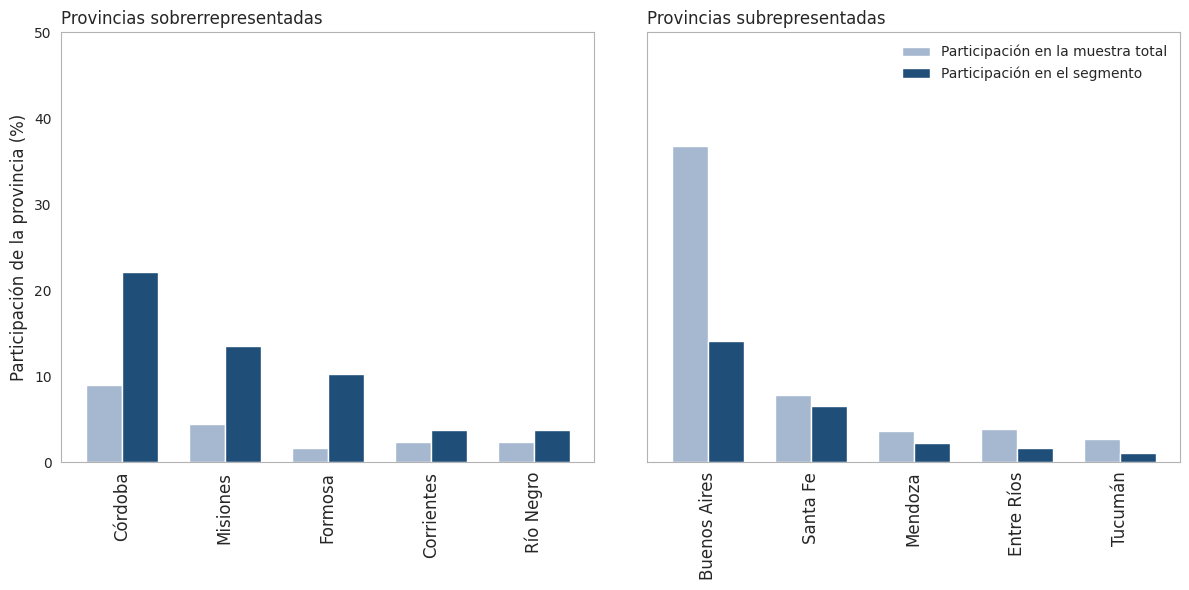

Guardado: ../5_graficos/representacion_provincias_nsebajo_desempenoalto.png


In [93]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
COLOR_BLUE_LIGHT = "#A6B7D0"  # azul claro para la segunda serie
COLOR_BLUE_MAIN = "#1F4E79" 
COLOR_SPINE = "#b3b3b3"

# ====== Preparación (ordenar por la métrica del segmento) ======
df_over = nse_bajo_desemp_alto_sobre.sort_values("nse_bajo_cat_alto_share", ascending=False).copy()
df_under = nse_bajo_desemp_alto_sub.sort_values("nse_bajo_cat_alto_share", ascending=False).copy()

# ====== Límite común eje Y ======
max_y = max(
    df_over[["share_total", "nse_bajo_cat_alto_share"]].to_numpy().max(),
    df_under[["share_total", "nse_bajo_cat_alto_share"]].to_numpy().max()
)
# ====== Figura ======
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)

# ----------------- Panel 1: Sobrerrepresentadas -----------------
x = range(len(df_over))
width = 0.35

ax1.bar(
    [i - width/2 for i in x],
    df_over["share_total"],
    width=width,
    color=COLOR_BLUE_LIGHT,
    label="Participación en la muestra total"
)
ax1.bar(
    [i + width/2 for i in x],
    df_over["nse_bajo_cat_alto_share"],
    width=width,
    color=COLOR_BLUE_MAIN,
    label="Participación en el segmento"
)

ax1.set_title("Provincias sobrerrepresentadas", loc="left", fontsize=12)
ax1.set_ylabel("Participación de la provincia (%)", fontsize=12)
ax1.set_xlabel("")
ax1.set_xticks(list(x))
ax1.set_xticklabels(df_over.index, rotation=90, fontsize=12)
ax1.set_ylim(0, max_y * 1.10)

# Estilo
ax1.grid(False)
for s in ax1.spines.values():
    s.set_color(COLOR_SPINE)
    s.set_linewidth(0.8)

# Formato de eje Y en %
ax1.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:.0f}"))

# ----------------- Panel 2: Subrrepresentadas -----------------
x2 = range(len(df_under))

ax2.bar(
    [i - width/2 for i in x2],
    df_under["share_total"],
    width=width,
    color=COLOR_BLUE_LIGHT,
    label="Participación en la muestra total"
)
ax2.bar(
    [i + width/2 for i in x2],
    df_under["nse_bajo_cat_alto_share"],
    width=width,
    color=COLOR_BLUE_MAIN,
    label="Participación en el segmento"
)

ax2.set_title("Provincias subrepresentadas", loc="left", fontsize=12)
ax2.set_xlabel("")
ax2.set_xticks(list(x2))
ax2.set_xticklabels(df_under.index, rotation=90, fontsize=12)
ax2.set_ylim(0,50)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:.0f}"))

ax2.grid(False)
for s in ax2.spines.values():
    s.set_color(COLOR_SPINE)
    s.set_linewidth(0.8)

# Leyenda solo en el segundo panel
ax2.legend(
    ["Participación en la muestra total", "Participación en el segmento"],
    fontsize=10,
    frameon=False,
    loc="upper right"
)

# Título general
#fig.suptitle(
#    "Provincias sobrerrepresentadas y subrrepresentadas en el segmento NSE bajo, desempeño alto",
#    fontsize=14,
#    y=1.02
#)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()

# Guardar
out_path = "../5_graficos/representacion_provincias_nsebajo_desempenoalto.png"
fig.savefig(out_path,  bbox_inches="tight")
print(f"Guardado: {out_path}")
plt.close(fig)

In [90]:
# --- Grupo NSE bajo, desempeño bajo ---
#Sobrerrepresentadas
nse_bajo_desemp_bajo_sobre=resultado.sort_values(by='representacion_nse_bajo_desempeño_bajo', ascending=False).head(5)[['share_total','nse_bajo_cat_bajo_share']]*100
print(nse_bajo_desemp_bajo_sobre)

#Subrrepresentadas
nse_bajo_desemp_bajo_sub=resultado.sort_values(by='representacion_nse_bajo_desempeño_bajo', ascending=True).head(5)[['share_total','nse_bajo_cat_bajo_share']]*100
print(nse_bajo_desemp_bajo_sub)

                     share_total  nse_bajo_cat_bajo_share
jurisdiccion                                             
Chaco                   2.800035                 5.923159
Misiones                4.367351                 7.097118
Santiago del Estero     1.664172                 3.681964
Corrientes              2.298142                 4.215582
Entre Ríos              3.856652                 5.336179
                                 share_total  nse_bajo_cat_bajo_share
jurisdiccion                                                         
Ciudad Autónoma de Buenos Aires     7.299463                 0.586980
Córdoba                             8.981245                 4.215582
Chubut                              1.329576                 0.426894
Río Negro                           2.368583                 1.547492
Mendoza                             3.627719                 2.828175


In [91]:
nse_bajo_desemp_bajo_sub = nse_bajo_desemp_bajo_sub.rename(index={"Ciudad Autónoma de Buenos Aires": "CABA"})


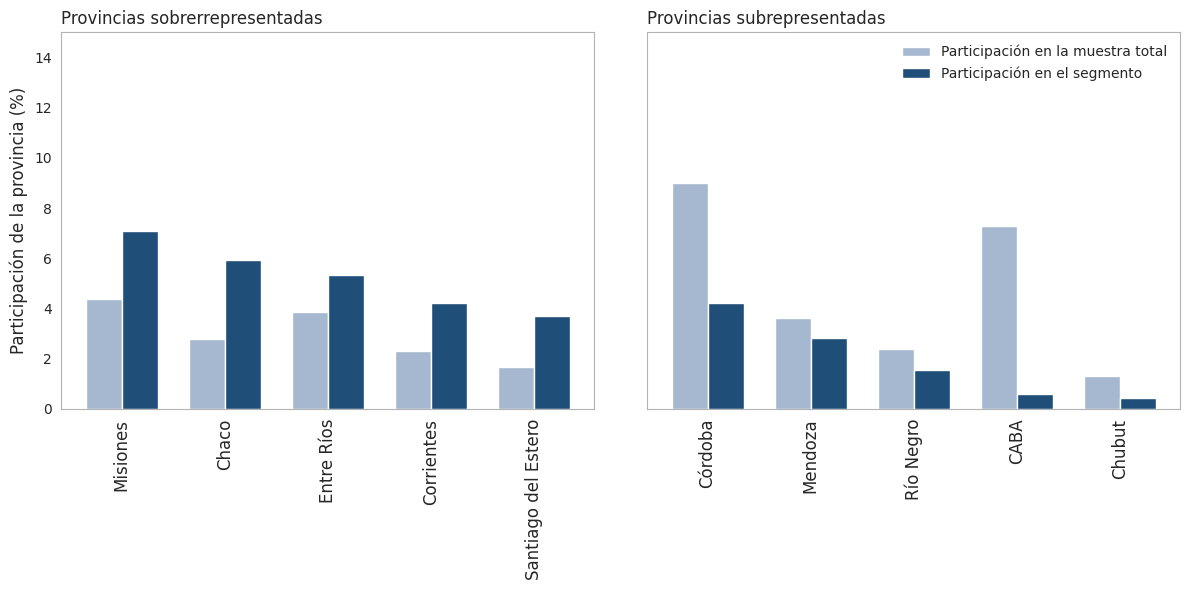

Guardado: ../5_graficos/representacion_provincias_nsebajo_desempenobajo.png


In [92]:
COLOR_BLUE_LIGHT = "#A6B7D0"  # azul claro para la segunda serie
COLOR_BLUE_MAIN = "#1F4E79" 
COLOR_SPINE = "#b3b3b3"

# ====== Preparación (ordenar por la métrica del segmento) ======
df_over = nse_bajo_desemp_bajo_sobre.sort_values("nse_bajo_cat_bajo_share", ascending=False).copy()
df_under = nse_bajo_desemp_bajo_sub.sort_values("nse_bajo_cat_bajo_share", ascending=False).copy()

# ====== Límite común eje Y ======
max_y = max(
    df_over[["share_total", "nse_bajo_cat_bajo_share"]].to_numpy().max(),
    df_under[["share_total", "nse_bajo_cat_bajo_share"]].to_numpy().max()
)
# ====== Figura ======
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# ----------------- Panel 1: Sobrerrepresentadas -----------------
x = range(len(df_over))
width = 0.35

ax1.bar(
    [i - width/2 for i in x],
    df_over["share_total"],
    width=width,
    color=COLOR_BLUE_LIGHT,
    label="Participación en la muestra total"
)
ax1.bar(
    [i + width/2 for i in x],
    df_over["nse_bajo_cat_bajo_share"],
    width=width,
    color=COLOR_BLUE_MAIN,
    label="Participación en el segmento"
)

ax1.set_title("Provincias sobrerrepresentadas", loc="left", fontsize=12)
ax1.set_ylabel("Participación de la provincia (%)", fontsize=12)
ax1.set_xlabel("")
ax1.set_xticks(list(x))
ax1.set_xticklabels(df_over.index, rotation=90, fontsize=12)
ax1.set_ylim(0, max_y * 1.10)

# Estilo
ax1.grid(False)
for s in ax1.spines.values():
    s.set_color(COLOR_SPINE)
    s.set_linewidth(0.8)

# Formato de eje Y en %
ax1.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:.0f}"))

# ----------------- Panel 2: Subrrepresentadas -----------------
x2 = range(len(df_under))

ax2.bar(
    [i - width/2 for i in x2],
    df_under["share_total"],
    width=width,
    color=COLOR_BLUE_LIGHT,
    label="Participación en la muestra total"
)
ax2.bar(
    [i + width/2 for i in x2],
    df_under["nse_bajo_cat_bajo_share"],
    width=width,
    color=COLOR_BLUE_MAIN,
    label="Participación en el segmento"
)

ax2.set_title("Provincias subrepresentadas", loc="left", fontsize=12)
ax2.set_xlabel("")
ax2.set_xticks(list(x2))
ax2.set_xticklabels(df_under.index, rotation=90, fontsize=12)
ax2.set_ylim(0,15)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:.0f}"))

ax2.grid(False)
for s in ax2.spines.values():
    s.set_color(COLOR_SPINE)
    s.set_linewidth(0.8)

# Leyenda solo en el segundo panel
ax2.legend(
    ["Participación en la muestra total", "Participación en el segmento"],
    fontsize=10,
    frameon=False,
    loc="upper right"
)

# Título general
#fig.suptitle(
#    "Provincias sobrerrepresentadas y subrrepresentadas en el segmento NSE bajo, desempeño alto",
#    fontsize=14,
#    y=1.02
#)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()

# Guardar
out_path = "../5_graficos/representacion_provincias_nsebajo_desempenobajo.png"
fig.savefig(out_path,  bbox_inches="tight")
print(f"Guardado: {out_path}")
plt.close(fig)